<a href="https://colab.research.google.com/github/angon1/ds_az/blob/main/pandas/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pd_web

In [ ]:
# data import
def fetch_financial_data(company = 'AMZN'):
    return pd_web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2022-10-14 to 2017-10-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
df

In [ ]:
df.head(10)

In [ ]:
df.columns = [col.lower() for col in df.columns]

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
df.T.describe()

In [ ]:
df.open

In [ ]:
df = df.head(10)

In [ ]:
df[['open', 'close']]

In [ ]:
df.iloc[:, 1:3]

In [ ]:
df.iloc[0]

In [ ]:
df.iloc[:3]

In [ ]:
df.loc['2022-10-03':'2022-10-06']

In [ ]:
df = fetch_financial_data('UBER')
df['Average'] = (df.Open + df.Close) /2
df = df.sort_index()
df.head()

In [ ]:
df['Close_shift'] = df.Close.shift(1)

In [ ]:
df['percentage_change'] = df.Close/df.Close.shift(1) -1
df['daily_change'] = df.Close / df.Close_shift -1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,percentage change,daily change,percentage_change,daily_change
Date,,,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414,0.041414,0.041414


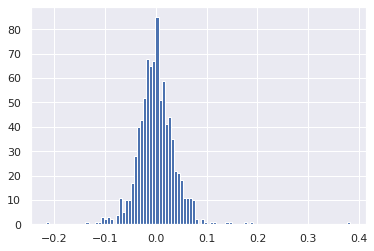

In [ ]:
df['daily_change'].hist(bins=100)

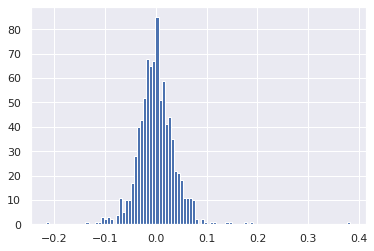

In [ ]:
import seaborn as sns
sns.set()
df['daily_change'].hist(bins=100)

In [ ]:
df[df.daily_change > 0]


,Open,High,Low,Close,Volume,Average,Close_shift,percentage change,daily change,percentage_change,daily_change
Date,,,,,,,,,,,
2019-05-14,38.310,39.960,36.8500,39.96,46661147,39.1350,37.10,0.077089,0.077089,0.077089,0.077089
2019-05-15,39.370,41.880,38.9500,41.29,36086065,40.3300,39.96,0.033283,0.033283,0.033283,0.033283
2019-05-16,41.480,44.060,41.2500,43.00,38115524,42.2400,41.29,0.041414,0.041414,0.041414,0.041414
2019-05-24,41.280,41.510,40.5000,41.51,8786751,41.3950,40.47,0.025698,0.025698,0.025698,0.025698
2019-05-31,41.150,41.570,39.4100,40.41,23209848,40.7800,39.80,0.015327,0.015327,0.015327,0.015327
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,26.160,27.310,26.1600,26.50,23894897,26.3300,26.42,0.003028,0.003028,0.003028,0.003028
2022-10-03,26.760,26.900,25.9600,26.72,19940791,26.7400,26.50,0.008302,0.008302,0.008302,0.008302
2022-10-04,27.625,29.250,27.5995,29.19,25462214,28.4075,26.72,0.092440,0.092440,0.092440,0.092440


In [ ]:
# London bike dataset
